<a href="https://colab.research.google.com/github/hpsuresh12345/Python-code/blob/master/Tweepy_Tweets_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tweepy as tw
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

% matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
consumer_key='o7hGGdbxC9rCzh6gNF7w68xjR'
consumer_secret='HoIZzpSF603DRfNlRpkCjjbbuYR76sUGdsGyI2E8ksagU5GYdr'
access_token='238097127-iYCOGfLha78ZegDY4JQLENIiYgYK6FVNJF8MJoV3'
access_token_secret='rpwe42w7RcZyptReSTRJl79hGE5zXYSAULUkNKrPKqAcp'


In [0]:
auth=tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tw.API(auth,wait_on_rate_limit=True)

In [0]:
public_tweets=api.home_timeline()
for tweet in public_tweets:
  print(tweet.text)

The Indian rupee is on a strong recovery path since the beginning of September as INR has gained nearly 147 paise a… https://t.co/zy20KcaWTI
Petrol prices in New Delhi went by 9 paise to Rs 71.97 per litre, while people in the National Capital have to shel… https://t.co/Atn39VT6Q9
RT @Gadgets360: Apple Counters Goldman Call on 'Negative Impact' of Apple TV+ Trial
https://t.co/fVGxVAOFkx
अभी मुठ्ठी नहीं खोली है मैंने आसमां सुन ले,

तेरा बस वक़्त आया है मेरा तो दौर आएगा।

#SaturdayThoughts
Practical Apache Spark in 10 minutes. Part 4 - MLlib https://t.co/XLdq7o5Pm0
Men attempt to set man on fire after he stopped them from molesting girl https://t.co/j1CoYj3ZUX https://t.co/gee8DdnZtV
RT @timesnowsports: Bundesliga: Wolfsburg held to a 1-1 draw against Fortuna Duesseldorf, miss chance to go top

https://t.co/DB04UFkhkM
RT @timesnowsports: Manchester United boss Ole Gunnar Solskjaer confident of making David de Gea stay beyond this season

https://t.co/4ae5…
Supreme Court has been consiste

In [0]:
user=api.get_user('@sureshhp1')
print("User Screen Name")
print(user.screen_name)
print("User Followers Count")
print(user.followers_count)

User Screen Name
sureshhp1
User Followers Count
26


In [0]:
user=api.get_user('@mutturajiu')
print("User Screen Name")
print(user.screen_name)
print("User Followers Count")
print(user.followers_count)

User Screen Name
mutturajiu
User Followers Count
6


In [0]:
for friend in user.friends():
  print(friend.screen_name)

ratnakar_20
itjegan
KatariyaPran
AmitShah
smritiirani
arunjaitley
chetan_bhagat
PMOIndia
narendramodi
KicchaSudeep


In [0]:
for followers in user.followers():
  print(followers.screen_name)

HanumegowdaGn
kudobala
prashanth1247
iccksouccours
sureshpratti
GNHanume


In [0]:
api.update_status("Sample Tweet from #Python and #Tweepy")

Status(_api=<tweepy.api.API object at 0x7fb0d2ed5b00>, _json={'created_at': 'Sat Sep 14 05:33:37 +0000 2019', 'id': 1172745193935839233, 'id_str': '1172745193935839233', 'text': 'Sample Tweet from #Python and #Tweepy', 'truncated': False, 'entities': {'hashtags': [{'text': 'Python', 'indices': [18, 25]}, {'text': 'Tweepy', 'indices': [30, 37]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://www.gadgetsnow.com/topic/in-car-infotainment-systems/reviews" rel="nofollow">Autotainment</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 238097127, 'id_str': '238097127', 'name': 'suresh hp1', 'screen_name': 'sureshhp1', 'location': 'Bangalore', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': True, 'followers_count': 26, 'friends_count': 135, 'listed_count': 2, 'created_at': 'Fri Jan 14 10:41:09 +

# Pull tweets by Keywords

In [0]:
tweets=tw.Cursor(api.search, q='@isro-filter:retweets',lang='en',since='2019-01-01').items(10)

In [0]:
tweets_text=[tweet.text for tweet in tweets]
tweets_text

['@NASA @esa @isro  out of imagination and curiosity I wrote something like this. What if big bang is rebirth of univ… https://t.co/cgMDxCt0uR',
 '@DhiraJThakrE12 @Hindusthaani1 @Astro_Neel @isro @chandrayan2 U r absolutely right and even indeed!!!..... But paki… https://t.co/arjfoWlcgm',
 '@Kishor_a @isro @GauravModiBhakt @nishants79 @Ramesh_BJP @AkshayBhade5 @AdvNileshSharma @VidarbhaPutra… https://t.co/SzIG1Dl01Y',
 '@isro Weldon  i am proud of isro',
 '@DrKumarVishwas @PMOIndia @isro @narendramodi Very nice sir',
 'Special pics for people teaching science to @isro &amp; comparing them with NASA. \n\nHere is what NASA does before sendi… https://t.co/gEh6gXKN8j',
 'Got my boarding pass for #Mars2020 from @NASA\n\nNASA will send my name to Mars.\n@isro @NASA https://t.co/YAJX69IN6k',
 '@M19Sen @BlackBallBoy1 @holatombola @isro Sanskrit is foreign language , are you serious ?',
 '@isro make most of your efforts on today &amp; tomorrow, as highest chances of contact with #Vikram exist o

In [0]:
len(tweets_text)

10

In [0]:
print(tweets_text[1])
print(tweets_text[9])

@DhiraJThakrE12 @Hindusthaani1 @Astro_Neel @isro @chandrayan2 U r absolutely right and even indeed!!!..... But paki… https://t.co/arjfoWlcgm
@isro @NASA @PMOIndia @narendramodi @AskAnshul @goldstone Now goldstone antena is trying to establish ntwrk wid cha… https://t.co/2X8Ui9njxw


# Pull tweet by search words

In [0]:
tweets=tw.Cursor(api.search,q='axis card offers-filter:retweets',lang="en",since='2019-01-01').items(10)
tweets_text=[tweet.text for tweet in tweets]
tweets_text

['@Flipkart Why axis bank? How many people have axix card? At least hdfc or sbi or even icici debit card..y icici cre… https://t.co/ZyPrz1hDxT',
 'Axis Bank Flipkart Offer\nGet 10% Instant Discount with Axis Bank Debit Card &amp; Credit Cards during the BigBillionDay… https://t.co/AY85YhCH9c',
 'TataCliq Axis Bank offer\nFlat 15% instant discount on Lifestyle\nFlat Rs. 500 instant discount on select Electronic… https://t.co/P5TIwDBOpN',
 '100% cashback on Freecharge (Mobile App/Mobile site/Website) on your first Recharge/Bill payment transaction using… https://t.co/Pc5AIRvAY0',
 '#deals #offers #india #freebies #coupon #shop #buy #savemoney #pricedrop\n\nFreecharge : Get 100% Cashback Upto Rs 10… https://t.co/D9f8lTwikX',
 'CheapTicket Axis Bank Offer\nDomestic Flights – Upto 650 off on min booking of Rs 5000. using Axis Bank Debit/Credit… https://t.co/nd1HDGXurN']

# Pull tweets by hashtags

In [0]:
tweets=tw.Cursor(api.search,q='#caraccessories-filter:retweets',lang="en",since='2019-01-01').items(10)
tweets_text=[tweet.text for tweet in tweets]
tweets_text

['Jacksonville Jaguars Sandstone Car Coasters, 2 Piece Coaster Set, Gift for Jaguar Fans, Dad, Boyfriend, Groomsmen,… https://t.co/6RSwNevxkZ',
 'Secure your phone anywhere!  #CarAccessories  https://t.co/2pv3vLsLru https://t.co/epFpz467PE',
 'Secure your phone anywhere!  #CarAccessories  https://t.co/2pv3vLsLru https://t.co/z7zGmGYDtC',
 'Add some Funkyness to your car with these fabulous\nBlack Fuzzy faux fur seatbelt pads \n1 pair , so one pad for you… https://t.co/4Rl2PgbOLh',
 'Secure your phone anywhere!  #CarAccessories  https://t.co/2pv3vLsLru https://t.co/KOtpop8FFf',
 'Car Paint Supplies, Click 4 more Info! #caraccessories #CarTips #carrepair\n\nhttps://t.co/1A1o3y1l8X\n\nhttps://t.co/wQVpJwoJs1 via @giphy',
 'If you enjoy taking your dog for a walk along the beach, be part of the Marine Conservation Society’s annual… https://t.co/gmTfl3NYy5',
 'Snow Leopard print faux fur fuzzy steering wheel cover\nHandmade from Snow Leopard print fluffy faux fur fabric\nShow… https://t.co/

# Uploading Image

In [0]:
api.update_with_media('pic1.jpg',
                      "This is your tweet message")

Status(_api=<tweepy.api.API object at 0x7fb0d2ed5b00>, _json={'created_at': 'Sat Sep 14 07:18:47 +0000 2019', 'id': 1172771660774223873, 'id_str': '1172771660774223873', 'text': 'This is your tweet message https://t.co/sH5bul4V9X', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1172771659020996608, 'id_str': '1172771659020996608', 'indices': [27, 50], 'media_url': 'http://pbs.twimg.com/media/EEaFnDqXkAAKtwe.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EEaFnDqXkAAKtwe.jpg', 'url': 'https://t.co/sH5bul4V9X', 'display_url': 'pic.twitter.com/sH5bul4V9X', 'expanded_url': 'https://twitter.com/sureshhp1/status/1172771660774223873/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 500, 'h': 333, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 500, 'h': 333, 'resize': 'fit'}, 'medium': {'w': 500, 'h': 333, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 1172771659020996608

# Creating Dataframe, location and User

In [0]:
# Define the search term and the date_since date as variables
search_words = "#wildfires"
date_since = "2018-11-16"



In [0]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5)
tweets

In [0]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5)

# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)
    

RT @CopernicusEU: Using satellite imagery such as that provided by the Copernicus programme's #Sentinels, @DEarthAfrica is building a platf…
RT @FantinaTedim: We are pleased to announce the publication of our new book on 'Extreme wildfire events and disasters'. An interdisciplina…
RT @FantinaTedim: We are pleased to announce the publication of our new book on 'Extreme wildfire events and disasters'. An interdisciplina…
RT @FantinaTedim: We are pleased to announce the publication of our new book on 'Extreme wildfire events and disasters'. An interdisciplina…
RT @FantinaTedim: We are pleased to announce the publication of our new book on 'Extreme wildfire events and disasters'. An interdisciplina…


In [0]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(5)

# Collect a list of tweets
[tweet.text for tweet in tweets]

["RT @FantinaTedim: We are pleased to announce the publication of our new book on 'Extreme wildfire events and disasters'. An interdisciplina…",
 'RT @EnviroEdgeNews: How #climatechange is affecting #Spain; #Heatwaves, violent #storms, #drought already taking their toll on the country,…',
 'RT @m_parrington: Arctic Circle #wildfires have been persistently above 2003-2018 average through July. Latest #Copernicus Atmosphere Monit…',
 "RT @FantinaTedim: We are pleased to announce the publication of our new book on 'Extreme wildfire events and disasters'. An interdisciplina…",
 "RT @FantinaTedim: We are pleased to announce the publication of our new book on 'Extreme wildfire events and disasters'. An interdisciplina…"]

In [0]:
new_search = search_words + " -filter:retweets"
new_search
'#wildfires -filter:retweets'

'#wildfires -filter:retweets'

In [0]:
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(5)

[tweet.text for tweet in tweets]

['A potent storm system moving into the Pacific Northwest will create gusty winds across much of the interior West ea… https://t.co/g88Ve59qU0',
 '#PGnECorporation ( $PCG +10.68%) shares trad(ed) higher after the company reported it agreed to a #settlement to re… https://t.co/H7YS8CFTWu',
 'A potent storm system moving into the Pacific Northwest will create gusty winds across much of the interior West ea… https://t.co/DokevSt3Qk',
 'Wait...wearing an N95 mask is worse for your health than not?  So confusing.\n\nSo thankful for the rain which has ma… https://t.co/pNftztl0l6',
 'Firefighters try to put out wildfire in Saronida, Greece https://t.co/KqBvxzsVhc #Heatwave #Wildfires']

In [0]:
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(5)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs
[['armonia_bolivia', 'Bolivia'],
 ['RagusoSergio', 'Switzerland'],
 ['WillMatlack', 'SF Bay Area'],
 ['climateandlife', 'Columbia University'],
 ['C21dynamic21', '']]

[['armonia_bolivia', 'Bolivia'],
 ['RagusoSergio', 'Switzerland'],
 ['WillMatlack', 'SF Bay Area'],
 ['climateandlife', 'Columbia University'],
 ['C21dynamic21', '']]

In [0]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])
tweet_text

,user,location
0,ZacharysWeather,"Arlington, WA"
1,itsahotdogtree,United States
2,breakingweather,"State College, PA"
3,e_lo,"Seattle, WA"
4,robinsnewswire,RT's Are FYI Purposes Only


# Updating Profile Picture

In [0]:
profilepic=api.update_profile_image('2.jpeg')
print("profilepic")

profilepic


# Find user and Location info

In [0]:
tweets=tw.Cursor(api.search,q='#iphone6s-filter:retweets',lang="en",since='2019-04-01').items(1000)
users = [[tweet.user.screen_name,tweet.user.location] for tweet in tweets]
users
location = pd.DataFrame(data=users,columns=['Screen_Name',"Location"])
location

,Screen_Name,Location
0,AquaBuzz79,India 🇮🇳
1,syd_cbd_repair,"Sydney, New South Wales"
2,montrealgia,"Ottawa, Ontario"
3,WraithLette,Juggalo Island
4,JungleeTech,
5,JungleeTech,
6,LuayHamzah,
7,TheJeremyShaver,"St.Louis, Atlanta, Houston"
8,vin2ktalks,"Bengaluru, India"
9,TorspinW,"22314 foothill blvd, HaywardCA"


# Re tweet

API.retweet(id)

In [0]:
retweet=api.retweet(1172797145960845312)
retweet

Status(_api=<tweepy.api.API object at 0x7fb0d2ed5b00>, _json={'created_at': 'Sat Sep 14 09:10:50 +0000 2019', 'id': 1172799856802455552, 'id_str': '1172799856802455552', 'text': 'RT @RACEREVA: Now we have Mr. Akshay Kulkarni, Lead Data Scientist, Sapient who will be sharing his knowledge on the topic of Introduction…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'RACEREVA', 'name': 'RACE REVA University', 'id': 820884213809299456, 'id_str': '820884213809299456', 'indices': [3, 12]}], 'urls': []}, 'source': '<a href="https://www.gadgetsnow.com/topic/in-car-infotainment-systems/reviews" rel="nofollow">Autotainment</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 238097127, 'id_str': '238097127', 'name': 'suresh hp1', 'screen_name': 'sureshhp1', 'location': 'Bangalore', 'description': '', 'url': None, 'en

# Friendship Methods

In [0]:
friendshipmethods=api.create_friendship('@mutturajiu')

# Trends

In [0]:
api.trends_available()

[{'country': '',
  'countryCode': None,
  'name': 'Worldwide',
  'parentid': 0,
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'woeid': 1},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Winnipeg',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'woeid': 2972},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Ottawa',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'woeid': 3369},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Quebec',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'woeid': 3444},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Montreal',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',

# Trends based on Lat and Long

In [0]:
trends_location=api.trends_closest(12.9716, 77.5946)
trends_location

[{'country': 'India',
  'countryCode': 'IN',
  'name': 'Bangalore',
  'parentid': 23424848,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2295420',
  'woeid': 2295420}]

# world trends

In [0]:
# Get all the locations where Twitter provides trends service
world_trends = api.trends_available()
world_trends

[{'country': '',
  'countryCode': None,
  'name': 'Worldwide',
  'parentid': 0,
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'woeid': 1},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Winnipeg',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'woeid': 2972},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Ottawa',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'woeid': 3369},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Quebec',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'woeid': 3444},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Montreal',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',

# Trending topics in Sanfransisco

In [0]:
# Get trending topics in San Francisco (its WOEID is 2487956)
sfo_trends = api.trends_place(id =2487956)
sfo_trends

[{'as_of': '2019-09-14T09:26:16Z',
  'created_at': '2019-09-14T09:22:06Z',
  'locations': [{'name': 'San Francisco', 'woeid': 2487956}],
  'trends': [{'name': 'Bay Bridge',
    'promoted_content': None,
    'query': '%22Bay+Bridge%22',
    'tweet_volume': None,
    'url': 'http://twitter.com/search?q=%22Bay+Bridge%22'},
   {'name': 'Friday the 13th',
    'promoted_content': None,
    'query': '%22Friday+the+13th%22',
    'tweet_volume': 743414,
    'url': 'http://twitter.com/search?q=%22Friday+the+13th%22'},
   {'name': '#DemDebate',
    'promoted_content': None,
    'query': '%23DemDebate',
    'tweet_volume': 284604,
    'url': 'http://twitter.com/search?q=%23DemDebate'},
   {'name': 'Biden',
    'promoted_content': None,
    'query': 'Biden',
    'tweet_volume': 355793,
    'url': 'http://twitter.com/search?q=Biden'},
   {'name': 'Eddie Money',
    'promoted_content': None,
    'query': '%22Eddie+Money%22',
    'tweet_volume': 81755,
    'url': 'http://twitter.com/search?q=%22Eddie+

# TWeet analytics from tweet dataset

In [0]:
#Create document list
tweets_text = pd.read_csv("tweets.csv")
tweets_text.head(10)

,Unnamed: 0,Tweets
0,0,'PM @narendramodi will create more efficiency ...
1,1,The central government had no outstanding #loa...
2,2,Why Modi government 2.0 might have to change i...
3,3,@BhavikaKapoor5 Whenever and wherever the gove...
4,4,India’s growth rate ‘much weaker than expected...
5,5,@BRS4INDIA @banpetaindia South India is the re...
6,6,hmmm..... Growth of premium devices in India i...
7,7,Banks to remain shut for 4 days due to strikes...
8,8,"Before we totally destroy what can save us, un..."
9,9,Don’t hate Millennials !\n\nMillennials will b...


In [0]:
tweets = tweets_text.Tweets

In [0]:
tweets[0:5]

0    'PM @narendramodi will create more efficiency ...
1    The central government had no outstanding #loa...
2    Why Modi government 2.0 might have to change i...
3    @BhavikaKapoor5 Whenever and wherever the gove...
4    India’s growth rate ‘much weaker than expected...
Name: Tweets, dtype: object

In [0]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 1000): # iterate through the list of 1000 tweets
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  tweets_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',tweets[i])
  # convert all words to lower case
  tweets_cln = tweets_cln.lower()
  # split sentences into words
  tweets_cln = tweets_cln.split()
 # remove English stop words
  tweets_cln = [x for x in tweets_cln if not x in stop_words]
  # stem words to the base form
  #tweets_text_cln = [ps.stem(x) for x in tweets_text_cln]
  # join words to form the original sentences
  tweets_cln = " ".join(tweets_cln)
  # append to the list to get all Tweets in one place
  corpus.append(tweets_cln)

In [0]:
corpus

['pm create efficiency economy',
 'central government outstanding loans week earlier well',
 'modi government might change political economy script via',
 'whenever wherever government start depending corrupt businessmen overall health',
 'indias growth rate much weaker expected imfimf internationalmonetaryfund',
 'south india reason india less developedomg kid really go c',
 'hmmm growth premium devices india q apriljune price bracket rs w',
 'banks remain shut days due strikes holidays',
 'totally destroy save us understand sacred economy nature india politics ramrajya',
 'dont hate millennials millennials driving force indian economy india crore millennia',
 'ghazwa e hind lolkeep reading comic books th century dessert cult lolindia worlds r',
 'india poor public infrastructure roads flyovers footpaths parks etc missing india invests',
 'office india eagerly waiting',
 'irctc run delhilucknow tejas express laced highend facilities releases complete train schedule',
 'india doesnt ne

# Bag of words

In [0]:
bagofwords =[]
for i in range(0,1000):
  words = corpus[i].split()
  bagofwords.append(words)

In [0]:
bagofwords[0]

['pm', 'create', 'efficiency', 'economy']

# Leverage itertools and collection to count frequency

In [0]:
all_words=list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print("Most commonly occuring words and freuqency\n")
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

['pm', 'create', 'efficiency', 'economy', 'central', 'government', 'outstanding', 'loans', 'week', 'earlier']

Most commonly occuring words and freuqency



[('india', 426),
 ('economy', 399),
 ('indias', 132),
 ('indian', 64),
 ('modi', 57),
 ('growth', 54),
 ('amp', 53),
 ('much', 48),
 ('economic', 48),
 ('trillion', 44),
 ('government', 35),
 ('via', 35),
 ('expected', 35),
 ('people', 35),
 ('dont', 34),
 ('world', 34),
 ('imf', 34),
 ('one', 33),
 ('billion', 33),
 ('weaker', 32)]

# Remove words which are used for search queries

In [0]:
words_to_remove=['india','economy','indian','much','amp']
bagofwords_new = [[x for x in word if not x in words_to_remove] for word in bagofwords]

In [0]:
all_words=list(itertools.chain(*bagofwords_new))
print(all_words[0:10])
print()
print("Most commonly occuring words and frequency\n")
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['pm', 'create', 'efficiency', 'central', 'government', 'outstanding', 'loans', 'week', 'earlier', 'well']

Most commonly occuring words and frequency



[('indias', 132),
 ('modi', 57),
 ('growth', 54),
 ('economic', 48),
 ('trillion', 44),
 ('government', 35),
 ('via', 35),
 ('expected', 35),
 ('people', 35),
 ('dont', 34),
 ('world', 34),
 ('imf', 34),
 ('one', 33),
 ('billion', 33),
 ('weaker', 32),
 ('pakistan', 32),
 ('minister', 32),
 ('govt', 31),
 ('gdp', 31),
 ('trade', 29)]

# Form a dataframe with the 20 most commonly used words

In [0]:
freq_word_df=pd.DataFrame(words_freq.most_common(20),columns=['Words','Freq'])
freq_word_df.head()

,Words,Freq
0,indias,132
1,modi,57
2,growth,54
3,economic,48
4,trillion,44


# Plot the most commonly used words

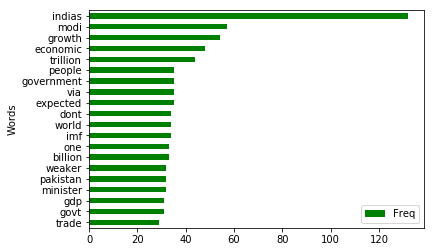

In [0]:
freq_word_df.sort_values(by='Freq').plot.barh(x='Words',y='Freq',color="green")
plt.show;

# Build a word cloud from most commonly 

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string=" ".join(freq_word_df.Words)
wordcloud = WordCloud(#stopwords=STOPWORDS,
                     background_color='black',
                     max_words=20
                     ).generate(word_string)

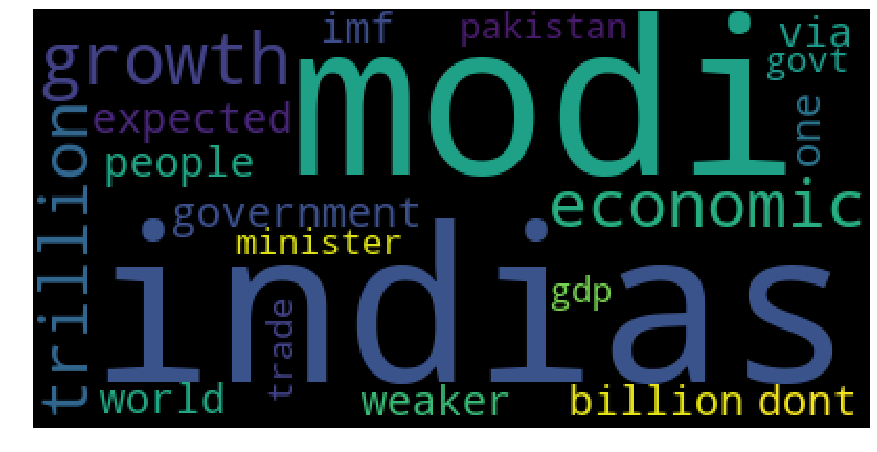

In [0]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we will find sentiments of each tweet using TextBlob

In [0]:
sentiment_text=[TextBlob(tweet) for tweet in corpus]
print(sentiment_text[10].polarity)
print(sentiment_text[10])

0.25
ghazwa e hind lolkeep reading comic books th century dessert cult lolindia worlds r


In [0]:
sentiments = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=["Polarity", "Tweet_Text"])
sentiment_df.sort_values(by='Polarity', ascending=False)

,Polarity,Tweet_Text
321,1.000000,feeling concerned economy government india try...
941,1.000000,itc best company india going economy india fin...
993,1.000000,thinking indias economy rising excellent
424,1.000000,best please vote bjp coming election aap suppo...
56,0.933333,india must determine best economy billion indi...
54,0.900000,india must determine best economy billion indi...
58,0.800000,madam country withyou worries india amp econom...
664,0.800000,gandhi great ask king n pm concentrate crumbli...
751,0.800000,u must studied madarsepakistans economy great ...
618,0.800000,great effort tons gold reached england britain...


# Plot sentiment of tweets in the form of Histogram

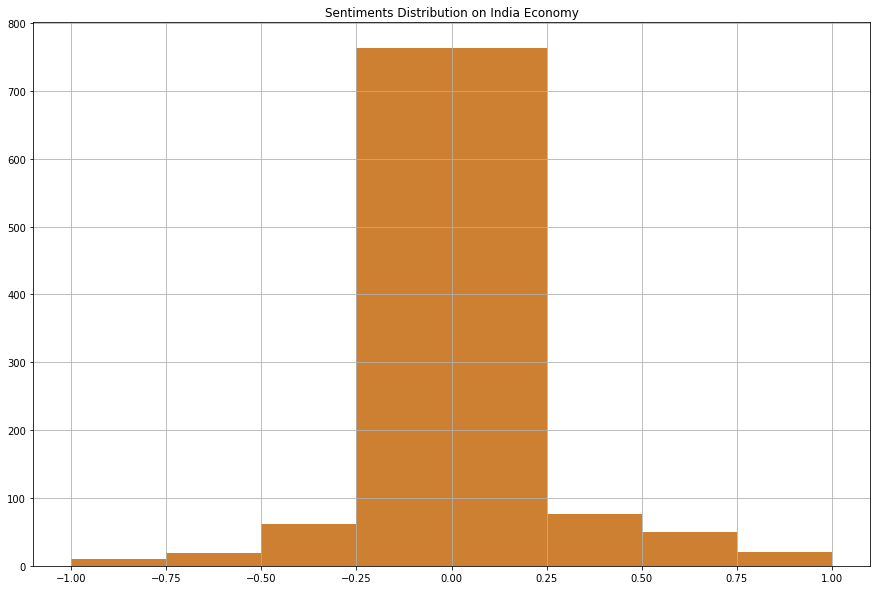

In [0]:
fig,ax=plt.subplots(figsize=(15,10))

#plot histogram of the polarity values
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1],ax=ax,color="#CD7F32")
plt.title("Sentiments Distribution on India Economy")
plt.show()

# Example of text polarity for the product tweets

In [0]:
text=TextBlob("This is very good product")
text.polarity

0.9099999999999999

In [0]:
text=TextBlob("This is very bad product")
text.polarity

-0.9099999999999998